<a href="https://colab.research.google.com/github/celygoce09/sales-forecast/blob/main/SALES_FORECAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
import pandas as pd

In [300]:
df = pd.read_csv('/content/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [301]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [302]:
# How many rows and columns?
df.shape

(8523, 12)

In [303]:
len(df)

8523

In [304]:
len(df.columns)

12

In [305]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [306]:
# What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [307]:
save_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [308]:
just_dtypes = df.dtypes
just_dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [309]:
# Are there duplicates? If so, drop any duplicates

df.duplicated().any()

False

In [310]:
df.duplicated().sum()

0

In [311]:
df[df.duplicated(keep = False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [312]:
# drop duplicate values
df.drop_duplicates(inplace = True)

# check duplicates
df.duplicated().sum()

0

In [313]:
#  Identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [314]:
df.shape

(8523, 12)

In [315]:
1463/8523

0.1716531737651062

In [316]:
# Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice)

df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [317]:
# replace missing 'Item_Weight' with the most frequent (mode)
df['Item_Weight'] = df['Item_Weight'].fillna('12.150')
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [318]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [319]:
# replace missing 'Outlet_Size' with the most frequent (mode)
df['Outlet_Size'] = df['Outlet_Size'].fillna('2793')
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [320]:
# Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [321]:
# Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 865.6+ KB


In [322]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [323]:
# replace
df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)

# check corrections
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [324]:
df['Outlet_Size'].value_counts()

Medium    2793
2793      2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [325]:
# replace
df['Outlet_Size'].replace('2793', 'Medium', inplace = True)
df['Outlet_Size'].replace('High', 'Large', inplace = True)

# check corrections
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [326]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [327]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean)
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [328]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [329]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [330]:
df['Item_Outlet_Sales'].sum()

18591125.4104

In [331]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Large,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [332]:
df2 = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().sort_values().reset_index()
df2

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1998,1.883402e+05
1,2009,1.851823e+06
2,2002,2.036725e+06
3,1997,2.118395e+06
4,1987,2.142664e+06
5,2007,2.167465e+06
6,1999,2.183970e+06
7,2004,2.268123e+06
8,1985,3.633620e+06


In [333]:
fig = px.bar(df2, y='Item_Outlet_Sales', x='Outlet_Establishment_Year')
fig.show();

In [334]:
df2 = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values().reset_index()
df2

,Item_Type,Item_Outlet_Sales
0,Seafood,1.488682e+05
1,Breakfast,2.322990e+05
2,Others,3.255176e+05
3,Starchy Foods,3.514013e+05
4,Hard Drinks,4.577934e+05
5,Breads,5.532372e+05
6,Soft Drinks,8.928977e+05
7,Meat,9.175656e+05
8,Health and Hygiene,1.045200e+06
9,Baking Goods,1.265525e+06


In [335]:
fig = px.bar(df2, y='Item_Outlet_Sales', x='Item_Type')
fig.show();

In [336]:
df2 = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values().reset_index()
df2

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,3.680343e+05
1,Supermarket Type2,1.851823e+06
2,Supermarket Type3,3.453926e+06
3,Supermarket Type1,1.291734e+07


In [337]:
fig = px.bar(df2, y='Item_Outlet_Sales', x='Outlet_Type')
fig.show();

In [338]:
df.groupby(['Outlet_Type', 'Item_Type'])[['Item_Outlet_Sales']].sum()

Item_Outlet_Sales
Outlet_Type       Item_Type                       
Grocery Store     Baking Goods          24827.0162
                  Breads                12604.9256
                  Breakfast              7843.7898
                  Canned                25759.1362
                  Dairy                 31451.7262
...                                            ...
Supermarket Type3 Others                40513.9300
                  Seafood               18809.5158
                  Snack Foods          513088.1172
                  Soft Drinks          147822.2476
                  Starchy Foods         49170.6616

[64 rows x 1 columns]

In [339]:
# Heatmap of the correlation between features

In [340]:
corr = df.corr()
corr

<ipython-input-340-4381f08f6434>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

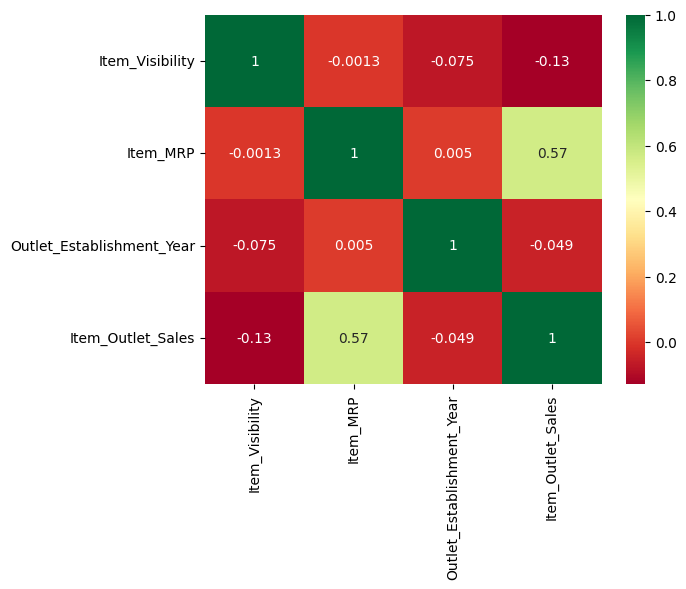

In [341]:
sns.heatmap(corr, cmap = 'RdYlGn', annot=True)

#  Data visualizations that help others understand trends in the data (explanatory data analysis).

In [342]:
print("-Null Values:", df.isna().sum(), '\n', sep='\n')

-Null Values:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64




In [343]:
df.shape

(8523, 12)

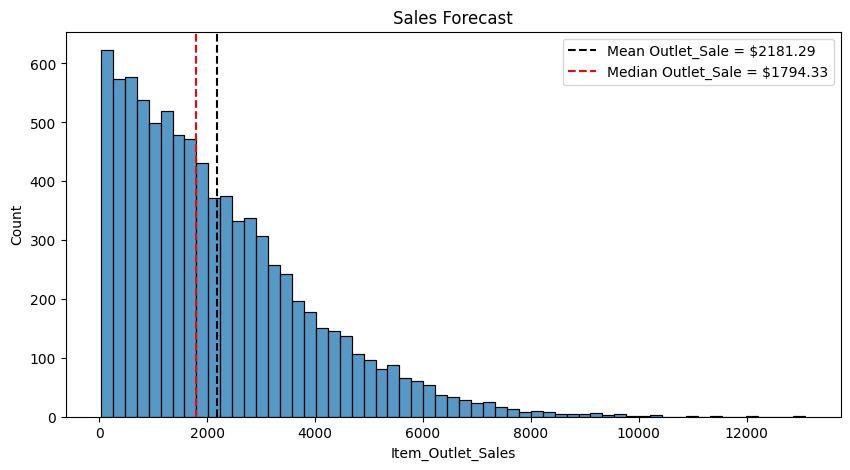

In [344]:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df, x='Item_Outlet_Sales', ax=ax)
ax.set(title="Sales Forecast");

## Annotating mean and median
mean_Outlet_Sale = df['Item_Outlet_Sales'].mean()
ax.axvline(mean_Outlet_Sale, color='k', ls='--', label=f"Mean Outlet_Sale = ${round(mean_Outlet_Sale,2)}")

med_Outlet_Sale = df['Item_Outlet_Sales'].median()
ax.axvline(med_Outlet_Sale, color='r', ls='--', label=f"Median Outlet_Sale = ${round(med_Outlet_Sale,2)}")

ax.legend();

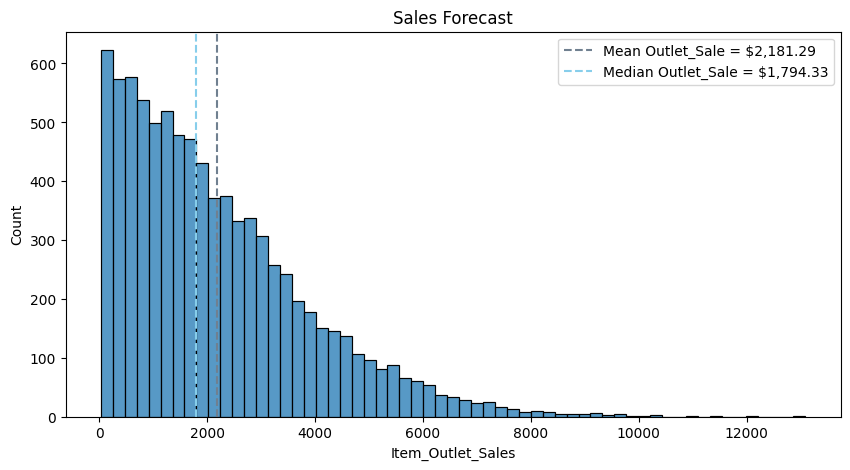

In [345]:
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=df,x='Item_Outlet_Sales',ax=ax)
ax.set_title('Sales Forecast');

mean_Outlet_Sale = df['Item_Outlet_Sales'].mean()
ax.axvline(mean_Outlet_Sale,
           color='slategray',
           ls='--',
           label=f"Mean Outlet_Sale = ${mean_Outlet_Sale:,.2f}")

med_Outlet_Sale = df['Item_Outlet_Sales'].median()
ax.axvline(med_Outlet_Sale,
           color='skyblue',
           ls='--',
           label=f"Median Outlet_Sale = ${med_Outlet_Sale:,.2f}")

ax.legend();

In [346]:
## functionize the above plot and call it plot_dist
def plot_dist(data, col, title, figsize=(10,5)):
  ## Plot histogram
  fig, ax = plt.subplots(figsize=figsize)

  ## Plot histogram
  sns.histplot(data=data,x=col,ax=ax)
  ax.set_title(title);

  ## Annotating mean and median
  # TODO: CODE HERE
  mean_Outlet_Sale = df['Item_Outlet_Sales'].mean()
  ax.axvline(mean_Outlet_Sale,
           color='slategray',
           ls='--',
           label=f"Mean Outlet_Sale = ${mean_Outlet_Sale:,.2f}")

  med_Outlet_Sale = df['Item_Outlet_Sales'].median()
  ax.axvline(med_Outlet_Sale,
           color='skyblue',
           ls='--',
           label=f"Median Price = ${med_Outlet_Sale:,.2f}")

  ax.legend();

  return fig, ax

In [347]:
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [348]:
# check statistics
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [349]:
# check using zscore
from scipy import stats

# create a var that includes only numeric cols
cols_to_check = df.select_dtypes(include = [np.number]).columns

# create a loop that detects outliers using the zscore
for column in cols_to_check:

  # calculate zscore for the col
  z_scores = np.abs(stats.zscore(df[column]))

  # find the indices where the zscore is > 3
  outlier_indices = np.where(z_scores > 3)

  # return the actual outlier values using the indices
  outlier_values = df[column].iloc[outlier_indices]

  # return the outliers and their indices
  print(f'Outliers in {column}: \n', outlier_values)

Outliers in Item_Visibility: 
 49      0.255395
83      0.293418
108     0.278974
174     0.291865
434     0.264125
          ...   
8194    0.299098
8215    0.279887
8273    0.297313
8345    0.266397
8432    0.227261
Name: Item_Visibility, Length: 95, dtype: float64
Outliers in Item_MRP: 
 Series([], Name: Item_MRP, dtype: float64)
Outliers in Outlet_Establishment_Year: 
 Series([], Name: Outlet_Establishment_Year, dtype: int64)
Outliers in Item_Outlet_Sales: 
 130     7968.2944
145     7370.4060
276     7452.9652
304     7696.6480
333     9267.9360
          ...    
7930    9227.9880
8039    8994.9580
8201    9390.4432
8245    7549.5062
8447    7588.1226
Name: Item_Outlet_Sales, Length: 90, dtype: float64


In [350]:
diff = (df.shape[0] - df.dropna().shape[0])

In [351]:
diff / df.shape[0]

0.0

In [352]:
# split X and y, you are predicting price
# identify target y and features X
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [353]:
# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [354]:
# select only object columns
# create a var that includes only object cols
categoricals = X_train.select_dtypes(include='object')

# check value counts for each object column
for col in categoricals.columns:
  print(col)
  print(categoricals[col].value_counts(), '\n')

Item_Identifier
FDF52    9
FDQ40    9
DRE49    9
NCB18    9
FDD38    9
        ..
DRH59    1
FDO28    1
NCR54    1
FDS39    1
FDG28    1
Name: Item_Identifier, Length: 1550, dtype: int64 

Item_Weight
12.150    1107
12.15       62
17.6        60
13.65       57
11.8        55
          ... 
4.59         1
8.485        1
6.17         1
7.685        1
5.155        1
Name: Item_Weight, Length: 413, dtype: int64 

Item_Fat_Content
Low Fat    4129
Regular    2263
Name: Item_Fat_Content, dtype: int64 

Item_Type
Fruits and Vegetables    948
Snack Foods              906
Household                695
Frozen Foods             632
Dairy                    507
Canned                   481
Baking Goods             478
Health and Hygiene       390
Soft Drinks              331
Meat                     302
Breads                   175
Hard Drinks              169
Others                   130
Starchy Foods            122
Breakfast                 84
Seafood                   42
Name: Item_Type, dtype: i

In [355]:
# these are transformers from scikit-learn
# scaler
scaler = StandardScaler()
scaler2 = StandardScaler()

# one-hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# imputer
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
missing_imputer = SimpleImputer(strategy='constant', fill_value='Missing')

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 865.6+ KB


In [357]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [358]:
df['Item_Weight'].value_counts()

12.150    1463
12.15       86
17.6        82
13.65       77
11.8        76
          ... 
7.275        2
7.685        1
9.42         1
6.52         1
5.4          1
Name: Item_Weight, Length: 416, dtype: int64

In [359]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [360]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [361]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [362]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [363]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [364]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [365]:
# create a list
Item_Type_labels = ['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks', 'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast', 'Seafood']
Outlet_Identifier_labels = ['OUT027', 'OUT013', 'OUT049', 'OUT046', 'OUT035', 'OUT045', 'OUT018', 'OUT017', 'OUT010', 'OUT019']
Outlet_Size_labels = ['Medium', 'Small', 'Large']
Outlet_Location_Type_labels = ['Tier 3', 'Tier 2', 'Tier 1']
Outlet_Type_labels = ['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2',]


# create a var for these lists
ordered_labels = [Outlet_Size_labels, Outlet_Location_Type_labels]
ordered_labels

[['Medium', 'Small', 'Large'], ['Tier 3', 'Tier 2', 'Tier 1']]

In [366]:
# instantitate encode
ordinal_enc = OrdinalEncoder(categories=ordered_labels)

In [367]:
# nominal data -> imputer, one-hot encode
nom_pipe = make_pipeline(missing_imputer, ohe)

# ordinal data -> imputer, ordinal encoding, scaling
ord_pipe = make_pipeline(freq_imputer, ordinal_enc, scaler2)

# numeric data -> imputer, scaler
num_pipe = make_pipeline(mean_imputer, scaler)

In [375]:
# select the column corresponding to the type of data
ordinal_cols = ['Outlet_Size', 'Outlet_Location_Type']
nominal_col = ['Outlet_Type']
num_selector = make_column_selector(dtype_include='number')

# pairing of pipeline and the corresponding columns
nom_tuple = (nom_pipe, ['Outlet_Type'])
ord_tuple = (ord_pipe, ordinal_cols)
num_tuple = (num_pipe, num_selector)

In [376]:
preprocessor = make_column_transformer(ord_tuple, num_tuple, nom_tuple, remainder='drop')

In [377]:
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Medium',
                                                                              'Small',
                                                                              'Large'],
                                                                             ['Tier '
                                                                              '3',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '1']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e6b5aefc8e0>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Outlet_Type'])])

In [378]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [379]:
X_train_processed

array([[-0.72591595, -1.08494779, -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [-0.72591595, -1.08494779, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.72591595,  1.38477667,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.72591595,  0.14991444, -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [-0.72591595,  0.14991444, -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.73967304,  1.38477667, -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

In [380]:
preprocessor.named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Medium', 'Small', 'Large'],
                                             ['Tier 3', 'Tier 2', 'Tier 1']])),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'pipeline-3': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='Missing', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False,
                                sparse_output=False))]),
 'remainder': 'drop'}

In [381]:
# get transformed column names
ohe = preprocessor.named_transformers_['pipeline-3']['onehotencoder']

In [382]:
# display feature names taken from ohe
nom_feature_names = ohe.get_feature_names_out(nominal_col)
nom_feature_names

array(['Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [383]:
# create a final col name list that includes ord features + num features + ohe features
final_cols = ordinal_cols + num_selector(X_train) + list(nom_feature_names)
final_cols

['Outlet_Size',
 'Outlet_Location_Type',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3']

In [384]:
# create a dataframe using X_train_processed and the column names
X_train_output = pd.DataFrame(X_train_processed, columns = final_cols)
X_train_output.head()

,Outlet_Size,Outlet_Location_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.725916,-1.084948,-0.712775,1.828109,1.327849,0.0,0.0,1.0,0.0
1,-0.725916,-1.084948,-1.291052,0.603369,1.327849,0.0,0.0,1.0,0.0
2,-0.725916,1.384777,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0
3,0.739673,0.149914,-1.004931,-0.952591,0.732018,0.0,1.0,0.0,0.0
4,-0.725916,0.149914,-0.965484,-0.336460,0.493686,0.0,1.0,0.0,0.0


In [385]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.35,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.25,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.35,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,FDD05,19.35,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,Medium,Tier 2,Supermarket Type1


In [386]:
X_train_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Outlet_Size                    6392 non-null   float64
 1   Outlet_Location_Type           6392 non-null   float64
 2   Item_Visibility                6392 non-null   float64
 3   Item_MRP                       6392 non-null   float64
 4   Outlet_Establishment_Year      6392 non-null   float64
 5   Outlet_Type_Grocery Store      6392 non-null   float64
 6   Outlet_Type_Supermarket Type1  6392 non-null   float64
 7   Outlet_Type_Supermarket Type2  6392 non-null   float64
 8   Outlet_Type_Supermarket Type3  6392 non-null   float64
dtypes: float64(9)
memory usage: 449.6 KB
